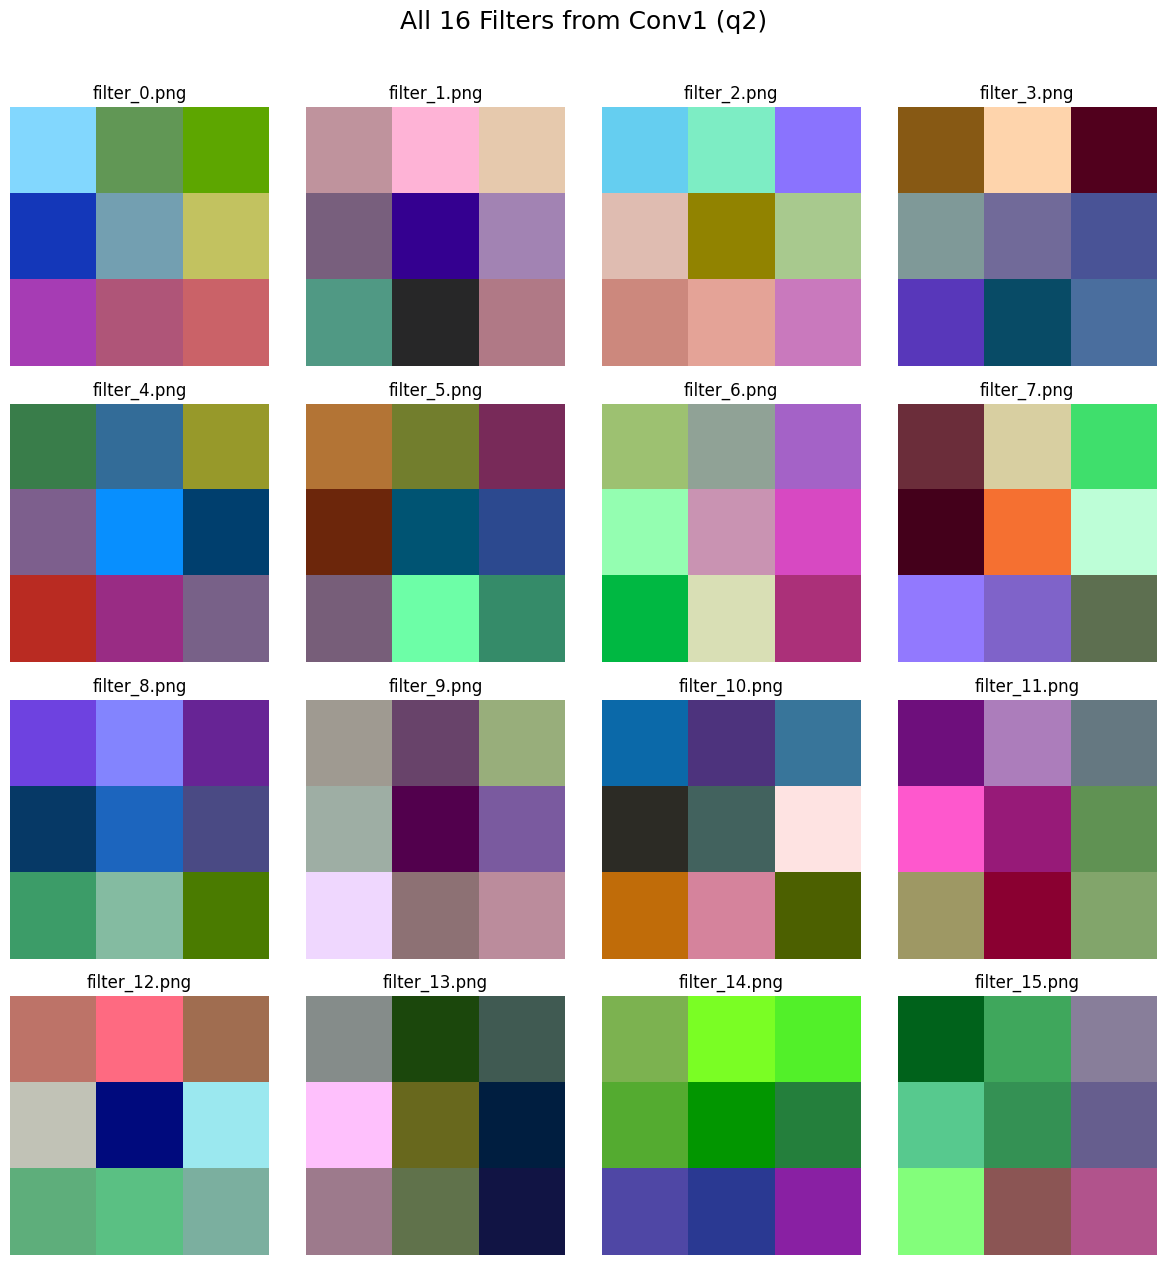

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import zipfile


zip_path = "./q2_filters.zip"
extract_dir = "./q2_filters"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)



# Load and display a few sample filters from the extracted folder
#filter_images = sorted([f for f in os.listdir(extract_dir) if f.endswith(".png")])[:6]
# Load and display all 16 filters from conv1
filter_images = sorted(
    [f for f in os.listdir(extract_dir) if f.endswith(".png") and "filter_" in f],
    key=lambda x: int(x.split("_")[1].split(".")[0])
)

fig, axs = plt.subplots(4, 4, figsize=(12, 12))
for ax, fname in zip(axs.flatten(), filter_images):
    img = Image.open(os.path.join(extract_dir, fname))
    ax.imshow(img)
    ax.set_title(fname)
    ax.axis('off')

plt.tight_layout()
plt.suptitle("All 16 Filters from Conv1 (q2)", fontsize=18, y=1.05)
plt.show()


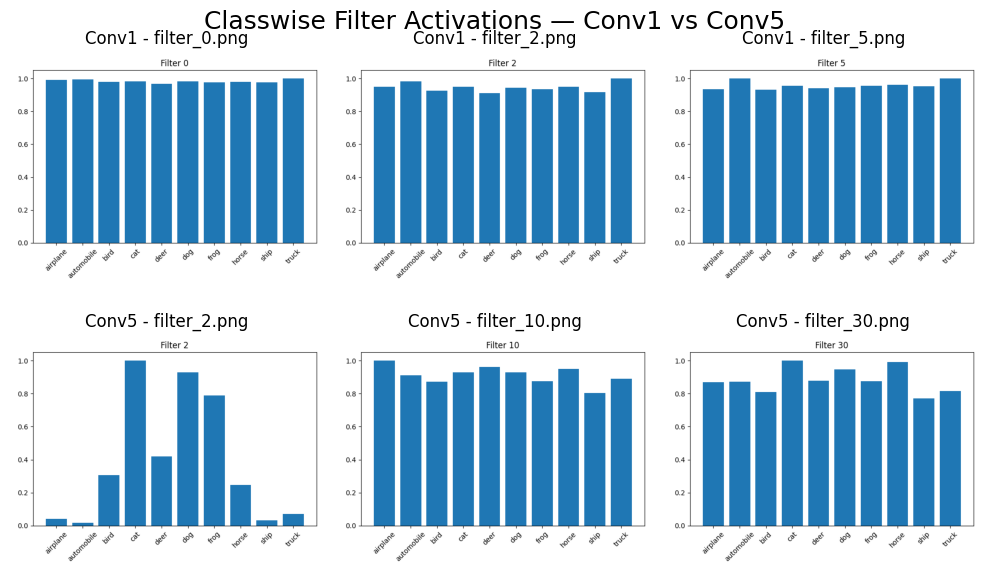

In [ ]:
zip_path_q3 = "q3_filters.zip"  
extract_dir_q3 = "q3_filters"

if not os.path.exists(extract_dir_q3):
    with zipfile.ZipFile(zip_path_q3, 'r') as zip_ref:
        zip_ref.extractall(extract_dir_q3)

filters_to_show = {
    "Conv1": ["filter_0.png", "filter_2.png", "filter_5.png"],
    "Conv5": ["filter_2.png", "filter_10.png", "filter_30.png"],
}

fig, axs = plt.subplots(2, 3, figsize=(10, 6))

for row_idx, (layer, file_list) in enumerate(filters_to_show.items()):
    for col_idx, fname in enumerate(file_list):
        path = os.path.join(extract_dir_q3, f"classwise_avg_{0 if layer == 'Conv1' else 4}", fname)
        img = Image.open(path)
        axs[row_idx, col_idx].imshow(img)
        axs[row_idx, col_idx].set_title(f"{layer} - {fname}")
        axs[row_idx, col_idx].axis("off")

plt.tight_layout()
plt.suptitle("Classwise Filter Activations — Conv1 vs Conv5", fontsize=18, y=1.00)
plt.show()


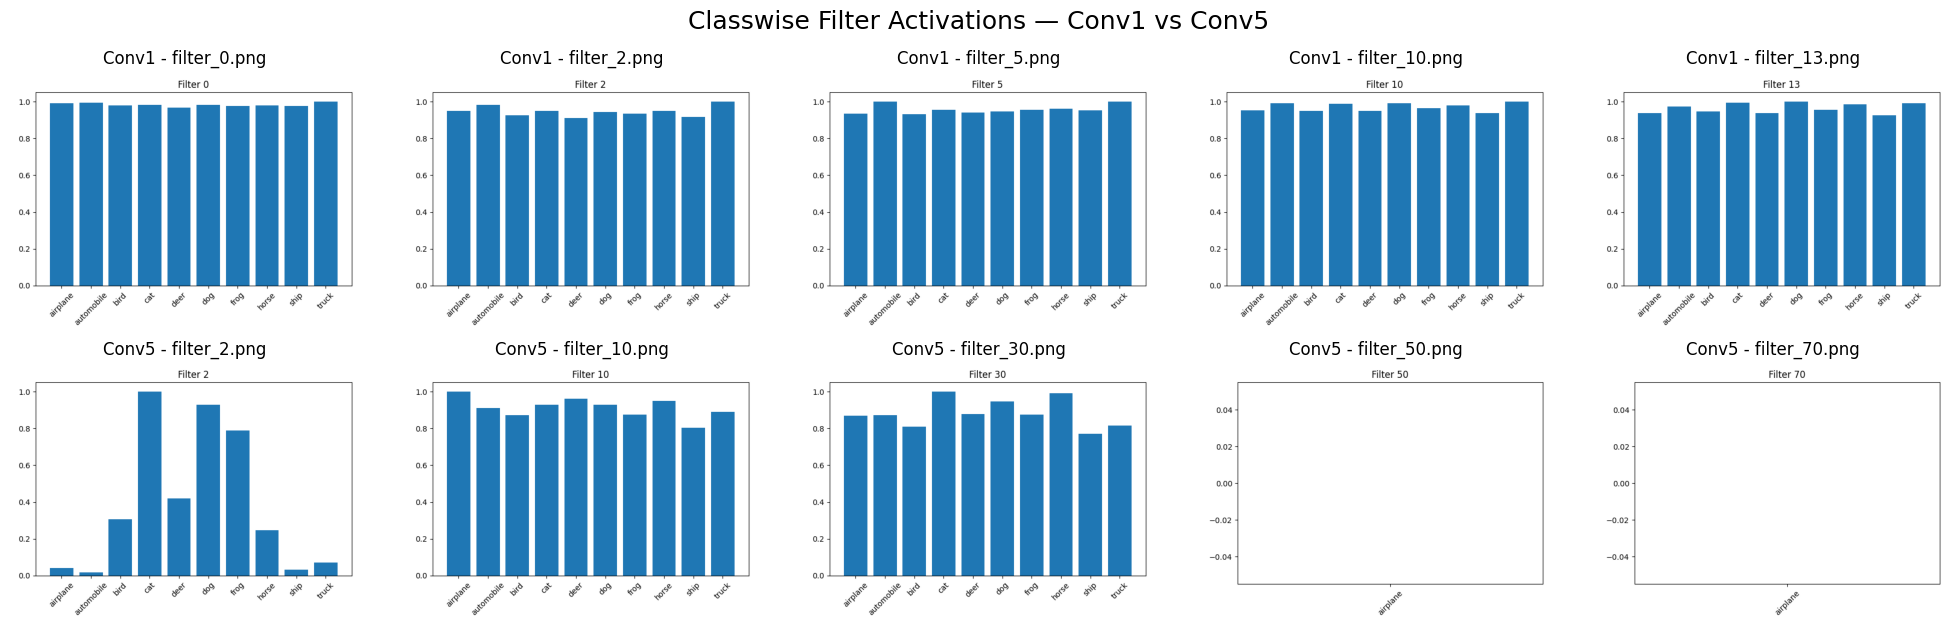

In [4]:
import os
import zipfile
import matplotlib.pyplot as plt
from PIL import Image

# === Step 1: Unzip the q3_filters.zip file ===
zip_path_q3 = "q3_filters.zip"  # Use full path if needed
extract_dir_q3 = "q3_filters"

# Extract if not already extracted
if not os.path.exists(extract_dir_q3):
    with zipfile.ZipFile(zip_path_q3, 'r') as zip_ref:
        zip_ref.extractall(extract_dir_q3)

# === Step 2: Select 5 filters from Conv1 and Conv5 ===
filters_to_show = {
    "Conv1": ["filter_0.png", "filter_2.png", "filter_5.png", "filter_10.png", "filter_13.png"],
    "Conv5": ["filter_2.png", "filter_10.png", "filter_30.png", "filter_50.png", "filter_70.png"],
}

# === Step 3: Load and plot the filter activation bar plots ===
fig, axs = plt.subplots(2, 5, figsize=(20, 6))

for row_idx, (layer, file_list) in enumerate(filters_to_show.items()):
    layer_idx = 0 if layer == "Conv1" else 4
    for col_idx, fname in enumerate(file_list):
        img_path = os.path.join(extract_dir_q3, f"classwise_avg_{layer_idx}", fname)
        
        if os.path.exists(img_path):
            img = Image.open(img_path)
            axs[row_idx, col_idx].imshow(img)
            axs[row_idx, col_idx].set_title(f"{layer} - {fname}")
        else:
            axs[row_idx, col_idx].text(0.5, 0.5, "Missing", ha='center', va='center')
            axs[row_idx, col_idx].set_title(f"{layer} - {fname}")

        axs[row_idx, col_idx].axis("off")

# === Step 4: Show final plot ===
plt.tight_layout()
plt.suptitle("Classwise Filter Activations — Conv1 vs Conv5", fontsize=18, y=1.05)
plt.show()
